In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Introduction

The ease with which we recognize a face, understand spoken words, read handwritten characters, identify our car keys in our pocket by feel, and decide whether an apple is ripe by its smell belies the astoundingly complex processes that underlie these acts of pattern recognition. **Pattern recognition** — the act of taking in raw data and taking an action based on the "category" of the pattern — has been crucial for our survival. Over the past tens of millions of years, we have evolved highly sophisticated neural and cognitive systems for such tasks.

## 1.1 Machine Perception

It is natural that we should seek to design and build machines that can recognize patterns. From automated speech recognition, fingerprint identification, optical character recognition, DNA sequence identification, and more, it is clear that reliable, accurate pattern recognition by machine would be immensely useful. 

Moreover, in solving the myriad problems required to build such systems, we gain a deeper understanding and appreciation for pattern recognition systems in the natural world — particularly in humans. For applications like speech and visual recognition, our design efforts may even be influenced by natural solutions, both in algorithms and special-purpose hardware design.

## 1.2 An Example: Fish Sorting

To illustrate the complexity of some of these problems, consider an example of a fish-packing plant that wants to automate the process of sorting incoming fish on a conveyor belt by species. As a pilot project, we aim to separate sea bass from salmon using optical sensing.

We set up a camera, take sample images, and note some physical differences between the two types of fish — length, lightness, width, fin characteristics, mouth position, and more. These observations suggest **features** to use in our classifier. However, we encounter noise or variations in the images due to lighting, fish position, and camera electronics.

### Feature Selection and Classification

Our goal is to hypothesize models for each species, eliminate noise, and classify the fish by choosing the best-fitting model for each sensed pattern. Here’s an outline of the prototype system:

1. **Image Capture**: A camera captures an image of the fish.
2. **Preprocessing**: Signals from the camera are simplified without losing relevant information, possibly using segmentation to isolate fish images from each other and the background.
3. **Feature Extraction**: Extract relevant features (e.g., fish length, lightness of scales).
4. **Classification**: Classify the fish based on extracted features, adjusting for factors like lighting variations.

### Example 1: Classifying by Length

Suppose that a sea bass is generally longer than a salmon. Length becomes a feature to examine. If $ l $ is the length of the fish, we choose a threshold $ l^* $ and classify as follows:

$$
\text{Classify as sea bass if } l > l^*
$$

However, histograms show that while sea bass are generally longer, there is significant overlap, making length alone a poor classifier.

### Example 2: Classifying by Lightness

We attempt another feature: **average lightness of fish scales**, ensuring consistent illumination. The new histograms (Fig. 1.3) show much clearer separation between species.

#### Adjusting Decision Boundaries

In some cases, costs of misclassification vary. Suppose customers tolerate occasional salmon in sea bass cans but dislike sea bass in salmon cans. Then, our decision boundary $ x^* $ for lightness should adjust as follows:

$$
\text{Move } x^* \text{ to reduce sea bass in salmon cans}
$$

This approach, though seemingly simple, demonstrates how feature selection and boundary adjustments improve classification performance while respecting cost asymmetry.

---

**Conclusion**: The example demonstrates a classic pattern recognition workflow, highlighting preprocessing, feature extraction, and decision boundary tuning.


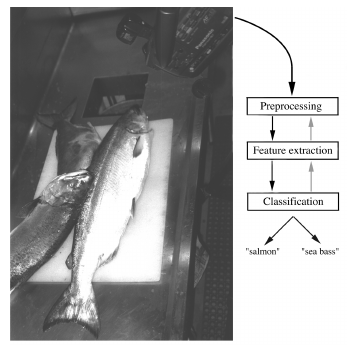

Fig.1: The objects to be classiﬁed are ﬁrst sensed by a transducer (camera), whose signals are preprocessed, then the features extracted and ﬁnally the classiﬁcation emitted (here either “salmon” or “sea bass”). Although the information ﬂow is often chosen to be from the source to the classiﬁer (“bottom-up”), some systems employ “top-down” ﬂow as well, in which earlier levels of processing can be altered based on the tentative or preliminary response in later levels (gray arrows). Yet others combine two or more stages into a uniﬁed step, such as simultaneous segmentation and feature extraction.

## Pattern Classification Example: Fish Sorting

In pattern classification tasks, an object to be classified is sensed, processed, and classified based on extracted features. In some systems, information flows from the source to the classifier in a **bottom-up** fashion, but in others, there may be a **top-down** approach. In top-down systems, preliminary results can influence earlier processing stages (indicated by gray arrows in Fig. 1.1). Some systems combine multiple stages into a unified step, such as simultaneous segmentation and feature extraction.

## Figure.1: Processing Flow

1. **Transducer**: A camera captures the raw image.
2. **Preprocessing**: Noise is reduced, and the background is removed.
3. **Feature Extraction**: Features like lightness or width are isolated.
4. **Classification**: Based on extracted features, the object is classified (as "salmon" or "sea bass").

## Decision Boundary and Classification Cost

When classifying fish as either sea bass or salmon, it is essential to consider **cost asymmetries** in misclassification. For instance, if classifying a sea bass as a salmon incurs a higher cost, we may set the decision threshold $ x^* $ lower. This consideration forms part of **decision theory**, where the goal is to choose an optimal decision rule that minimizes misclassification costs.

If only the **lightness** feature is used, we might set a decision threshold $ x^* $ to minimize errors, but performance may still be unsatisfactory. Suppose no single visual feature improves classification beyond lightness. In that case, we may incorporate additional features, like **width**.

## Figure.4: Feature Space and Decision Boundary

By incorporating two features, **lightness** $ x_1 $ and **width** $ x_2 $, the system can map each fish to a **feature vector**:

$$
x = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
$$

This vector forms a point in a **two-dimensional feature space** where we can separate classes. Suppose we collect feature data and observe points scattered in a plot, as shown in Fig.4. A decision boundary — a line dividing the two classes — can be set in this space. For example, we classify as **sea bass** if the feature vector falls above this line and as **salmon** if it falls below.

### Classification with Multiple Features

Adding more features (e.g., dorsal fin shape, eye placement) could further improve classification. However, some features may be redundant. For instance, if **eye color** perfectly correlates with width, it would add no benefit. Even with no restrictions on feature selection, too many features can complicate or degrade performance.

Suppose that additional features either add significant computational costs or marginal improvements. In that case, it may be optimal to base decisions solely on the two features, **lightness** and **width**. If our model is complex, a more intricate decision boundary, rather than a straight line, might better separate the classes.

---

By examining these steps in feature selection, decision theory, and boundary setting, we see how pattern classification leverages specific criteria to optimize decision-making in tasks like automated fish sorting.



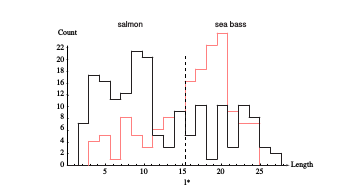

Fig.2: Histograms for the length feature for the two categories. No single thresh- old value l∗ (decision boundary) will serve to unambiguously discriminate between the two categories; using length alone, we will have some errors. The value l∗ marked will lead to the smallest number of errors, on average.

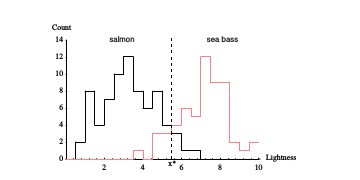

Fig.3: Histograms for the lightness feature for the two categories. No single threshold value x∗ (decision boundary) will serve to unambiguously discriminate be- tween the two categories; using lightness alone, we will have some errors. The value x∗ marked will lead to the smallest number of errors, on average.


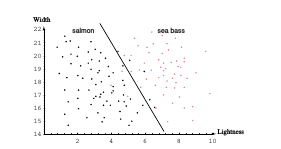

Fig.4: The two features of lightness and width for sea bass and salmon. The dark line might serve as a decision boundary of our classiﬁer. Overall classiﬁcation error on the data shown is lower than if we use only one feature as in Fig.3, but there will still be some errors.

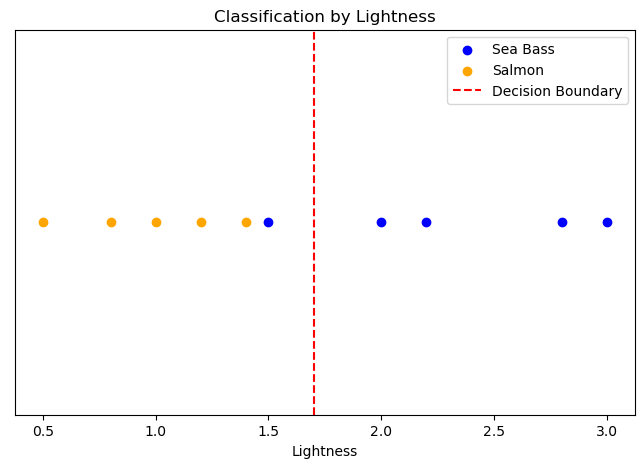

In [3]:
import matplotlib.pyplot as plt

# Sample data: lightness values for sea bass and salmon
sea_bass_lightness = [1.5, 2.0, 2.2, 2.8, 3.0]
salmon_lightness = [0.5, 0.8, 1.0, 1.2, 1.4]

# Decision threshold for lightness
threshold = 1.7

# Plot data
plt.figure(figsize=(8, 5))
plt.scatter(sea_bass_lightness, [1] * len(sea_bass_lightness), color='blue', label='Sea Bass')
plt.scatter(salmon_lightness, [1] * len(salmon_lightness), color='orange', label='Salmon')
plt.axvline(x=threshold, color='red', linestyle='--', label='Decision Boundary')

# Annotations and labels
plt.xlabel('Lightness')
plt.yticks([])
plt.legend()
plt.title('Classification by Lightness')
plt.show()


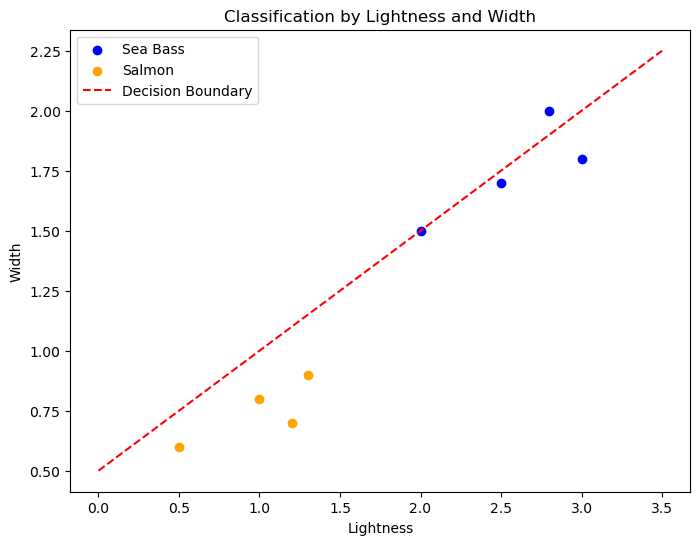

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: (lightness, width) for sea bass and salmon
sea_bass_features = [(2.0, 1.5), (2.5, 1.7), (3.0, 1.8), (2.8, 2.0)]
salmon_features = [(0.5, 0.6), (1.0, 0.8), (1.2, 0.7), (1.3, 0.9)]

# Convert lists to numpy arrays for plotting
sea_bass_features = np.array(sea_bass_features)
salmon_features = np.array(salmon_features)

# Define a decision boundary: for simplicity, we'll use a linear boundary
def decision_boundary(x):
    return 0.5 * x + 0.5

# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(sea_bass_features[:, 0], sea_bass_features[:, 1], color='blue', label='Sea Bass')
plt.scatter(salmon_features[:, 0], salmon_features[:, 1], color='orange', label='Salmon')

# Plot decision boundary
x_values = np.linspace(0, 3.5, 100)
y_values = decision_boundary(x_values)
plt.plot(x_values, y_values, color='red', linestyle='--', label='Decision Boundary')

# Annotations and labels
plt.xlabel('Lightness')
plt.ylabel('Width')
plt.legend()
plt.title('Classification by Lightness and Width')
plt.show()


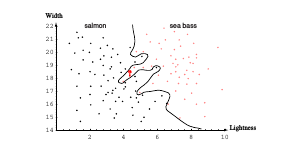

Fig.5: Overly complex models for the ﬁsh will lead to decision boundaries that are complicated. While such a decision may lead to perfect classiﬁcation of our training samples, it would lead to poor performance on future patterns. The novel test point marked ? is evidently most likely a salmon, whereas the complex decision boundary shown leads it to be misclassiﬁed as a sea bass.

The ease with which we recognize a face, understand spoken words, read handwritten characters, identify objects by touch, and determine whether an apple is ripe by its smell belies the astoundingly complex processes underlying pattern recognition. Pattern recognition is the act of taking in raw data and making decisions based on its "category" and has been crucial for survival. Over millions of years, humans have evolved sophisticated neural and cognitive systems for such tasks.

##  Machine Perception

We naturally aim to design machines that recognize patterns, such as in **speech recognition**, **fingerprint identification**, **optical character recognition**, and **DNA sequence identification**. Solving these challenges not only helps in building reliable systems but also deepens our understanding of human pattern recognition. Some machine designs take inspiration from natural processes, influencing algorithms and hardware.

## Example of Classification

Consider a fish-packing plant that automates sorting incoming fish into "sea bass" and "salmon" using optical sensing. We can distinguish them by certain features, like **length** and **lightness**, which form the basis of our classifier.

### Classifier Model

To model the features mathematically, we hypothesize two classes. For example, if sea bass are generally longer than salmon, then **length** can be a feature. We might classify a fish by checking if its length $ l $ exceeds a threshold $ l^* $.

The classifier operates as follows:
1. **Capture**: A camera captures an image of the fish.
2. **Preprocess**: Signals are processed to isolate relevant information, such as segmenting the fish from the background.
3. **Feature Extraction**: Extract measurable attributes (length, lightness) to classify.
4. **Classification**: Decide based on features if the fish is sea bass or salmon.

When classifying, the features are represented as a vector:

$$
x = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
$$

where $ x_1 $ represents lightness, and $ x_2 $ represents width.

### Cost Functions and Decision Boundaries

Different decision tasks impact our choice of features and decision boundaries. For example, a fish-packing company may wish to reduce the misclassification of sea bass as salmon to avoid customer dissatisfaction. This involves setting a decision boundary $ x^* $ for **lightness**, which reduces error.

### Generalization

A classifier's ability to generalize to unseen data is essential. Adding complexity to the model, as shown in Fig.5, may **overfit** training data without improving performance on new patterns.

To achieve generalization, a classifier should balance between complexity and simplicity, following **Occam's Razor**:

> Entities are not to be multiplied without necessity.

If additional features degrade performance, a simpler decision boundary, as shown in Fig.6, may be preferable.

## Statistical and Syntactic Pattern Recognition

1. **Statistical Pattern Recognition**: Focuses on statistical properties, usually through probability densities, to handle **noisy data**.
2. **Syntactic Pattern Recognition**: Uses rules or grammars to classify, e.g., checking if a sentence is grammatical based on word frequencies.

### Representation in Pattern Recognition

Choosing a suitable representation is crucial in pattern recognition. Patterns may be represented as:
- Real-valued vectors
- Ordered attribute lists
- Part-based descriptions

A good representation should reveal structural relationships naturally and represent the model efficiently.


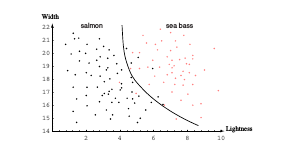

Fig.6: The decision boundary shown might represent the optimal tradeoﬀ between performance on the training set and simplicity of classiﬁer.


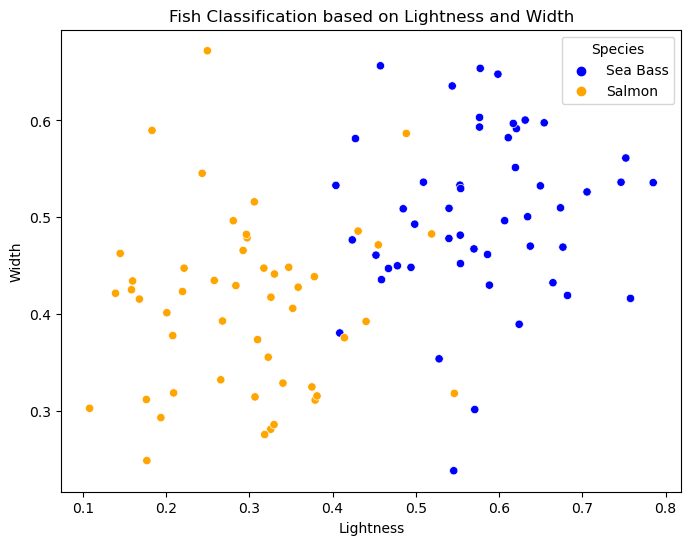

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample dataset
# Let's create a small dataset for sea bass and salmon with two features: lightness and width
np.random.seed(42)
sea_bass_lightness = np.random.normal(0.6, 0.1, 50)  # mean lightness around 0.6
sea_bass_width = np.random.normal(0.5, 0.1, 50)      # mean width around 0.5
salmon_lightness = np.random.normal(0.3, 0.1, 50)    # mean lightness around 0.3
salmon_width = np.random.normal(0.4, 0.1, 50)        # mean width around 0.4

# Create a DataFrame
data = pd.DataFrame({
    'Lightness': np.concatenate([sea_bass_lightness, salmon_lightness]),
    'Width': np.concatenate([sea_bass_width, salmon_width]),
    'Species': ['Sea Bass'] * 50 + ['Salmon'] * 50
})

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Lightness', y='Width', hue='Species', palette=['blue', 'orange'])
plt.title('Fish Classification based on Lightness and Width')
plt.xlabel('Lightness')
plt.ylabel('Width')
plt.legend(title='Species')
plt.show()


## Pattern Recognition and Classification

### Introduction

Pattern recognition seeks to identify and classify patterns within data, particularly focusing on those patterns that lead to the same action being "close" to one another, and those leading to different actions as "far apart." The success of a classifier often depends on how well we quantify these notions of closeness and separation.

### Desirable Characteristics of Representations

A robust classifier aims for a representation that is:
- **Simple:** Uses a minimal number of features, enabling easier training and cleaner decision boundaries.
- **Robust:** Insensitive to noise and other minor errors in the data.
- **Efficient:** Functions quickly with minimal computational resources.

---

## Representation by Synthesis

When data is insufficient, domain knowledge becomes crucial. **Analysis by synthesis** is one technique that models the generative process of patterns, for example, in speech recognition:
- All utterances of a sound like "dee" share common physiological production traits.
  
This method can be represented by a **production model** that hypothesizes a representation based on synthesis, analyzing how the pattern could have been generated.

---

## Example: Speech Recognition Using Production Representation

Speech recognition can consider physiological models where each phoneme is produced with distinct characteristics. For instance, **"dee"** sounds involve:
- **Jaw movement**, **mouth opening**, and **tongue placement**.

If we hypothesize a **motor model** that defines this, we can classify patterns by **how they are produced**.

### Equation for Generative Model

For speech synthesis, a physiological model might hypothesize that a phoneme $ p $ is generated by parameters $ \theta $:

$$
p(x; \theta) = f_{prod}(x, \theta)
$$

where $ f_{prod} $ is a function defining the physiological features. Recognizing a phoneme then involves estimating $ \theta $ from observed data $ x $.

---

## The Challenge of Object Recognition

Classifying objects like chairs presents a unique challenge due to the diversity of forms. A **functional model** might be more suitable, defining a chair by its ability to support a human. In this scenario:

1. **Representation** may focus on stability and support properties.
2. **Functionality** becomes a feature indirectly linked to visual characteristics.

### Functional Classification Model

For a functional object classifier, let:

$$
f(x) = \begin{cases} 
1 & \text{if } x \text{ supports a human} \\
0 & \text{otherwise} 
\end{cases}
$$

---

## Related Fields

Pattern classification intersects with fields like **statistical hypothesis testing** and **image processing** but differs fundamentally from each:

1. **Hypothesis Testing**: Assesses whether data support rejecting a null hypothesis. For example, testing whether fish are from a single species (null hypothesis) or different species (alternative hypothesis).

   - **Equation for Hypothesis Testing**:

   $$
   \text{Reject } H_0 \text{ if } P(D|H_0) < \alpha
   $$

   where $ D $ is the observed data and $ \alpha $ the significance level.

2. **Image Processing**: Involves transformations like rotation or contrast enhancement without information loss. Pattern classification, on the other hand, often loses information intentionally to categorize data.

### Feature Extraction vs. Pattern Classification

Feature extraction often simplifies an image into fewer features. For instance, finding peaks in intensity profiles transforms an image into intensity values while losing raw image data.

**Feature Extraction Example**:

If $ x $ is the input pattern, then feature extraction yields:

$$
\text{features} = \{ f_1(x), f_2(x), \dots, f_n(x) \}
$$

where $ n $ is typically less than the full set of data points in 


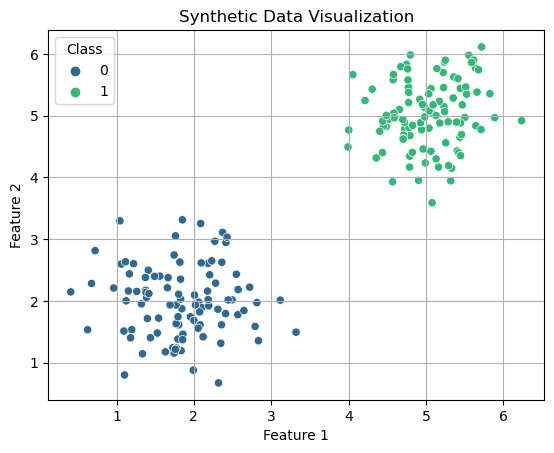

The new point (3, 3) is classified as class 0.


In [7]:
# Import required libraries
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_data(num_points=100):
    """Generates synthetic data for two classes."""
    class_0 = [(random.gauss(2, 0.5), random.gauss(2, 0.5)) for _ in range(num_points)]
    class_1 = [(random.gauss(5, 0.5), random.gauss(5, 0.5)) for _ in range(num_points)]
    
    data = class_0 + class_1
    labels = [0] * num_points + [1] * num_points
    return data, labels

# Visualize the data
def plot_data(data, labels):
    """Plots the synthetic data using Seaborn."""
    df = {'X1': [point[0] for point in data], 
          'X2': [point[1] for point in data], 
          'Label': labels}
    
    sns.scatterplot(data=df, x='X1', y='X2', hue='Label', palette='viridis')
    plt.title('Synthetic Data Visualization')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(title='Class')
    plt.grid()
    plt.show()

# Nearest neighbor classifier
def nearest_neighbor(new_point, data, labels):
    """Classifies a new point using the nearest neighbor method."""
    closest_point = min(data, key=lambda p: (p[0] - new_point[0]) ** 2 + (p[1] - new_point[1]) ** 2)
    index = data.index(closest_point)
    return labels[index]

# Main implementation
if __name__ == "__main__":
    # Step 1: Generate synthetic data
    data, labels = generate_data(num_points=100)
    
    # Step 2: Visualize the generated data
    plot_data(data, labels)
    
    # Step 3: Classify a new point
    new_point = (3, 3)  # New point to classify
    classification = nearest_neighbor(new_point, data, labels)
    print(f"The new point {new_point} is classified as class {classification}.")


## The Sub-problems of Pattern Classification

We have alluded to some of the issues in pattern classification and we now turn to a more explicit list of them. In practice, these typically require the bulk of the research and development effort. Many are domain or problem specific, and their solution will depend upon the knowledge and insights of the designer. Nevertheless, a few are of sufficient generality, difficulty, and interest that they warrant explicit consideration.

##  Feature Extraction

The conceptual boundary between feature extraction and classification proper is somewhat arbitrary: an ideal feature extractor would yield a representation that makes the job of the classifier trivial; conversely, an omnipotent classifier would not need the help of a sophisticated feature extractor. The distinction is forced upon us for practical, rather than theoretical reasons. Generally speaking, the task of feature extraction is much more problem and domain dependent than is classification proper, and thus requires knowledge of the domain. A good feature extractor for sorting fish would surely be of little use for identifying fingerprints, or classifying photomicrographs of blood cells. 

How do we know which features are most promising? Are there ways to automatically learn which features are best for the classifier? How many shall we use?

##  Noise

The lighting of the fish may vary, there could be shadows cast by neighboring equipment, the conveyor belt might shake — all reducing the reliability of the feature values actually measured. We define noise in very general terms: any property of the sensed pattern due not to the true underlying model but instead to randomness in the world or the sensors. All non-trivial decision and pattern recognition problems involve noise in some form. In some cases, it is due to the transduction in the signal, and we may consign to our preprocessor the role of cleaning up the signal, as for instance visual noise in our video camera viewing the fish. An important problem is knowing somehow whether the variation in some signal is noise or instead due to complex underlying models of the fish. How then can we use this information to improve our classifier?

##  Overfitting

In going from Figure 1.4 to Figure 1.5 in our fish classification problem, we were, implicitly, using a more complex model of sea bass and of salmon. That is, we were adjusting the complexity of our classifier. While an overly complex model may allow perfect classification of the training samples, it is unlikely to give good classification of novel patterns — a situation known as overfitting. One of the most important areas of research in statistical pattern classification is determining how to adjust the complexity of the model — not so simple that it cannot explain the differences between the categories, yet not so complex as to give poor classification on novel patterns. Are there principled methods for finding the best (intermediate) complexity for a classifier?

##  Model Selection

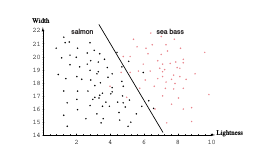
Fig 4.

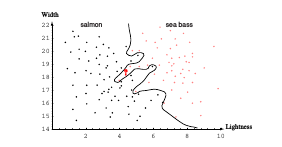

Fig. 5

We might have been unsatisfied with the performance of our fish classifier in Fig.4 & 5, and thus jumped to an entirely different class of model, for instance one based on some function of the number and position of the fins, the color of the eyes, the weight, shape of the mouth, and so on. How do we know when a hypothesized model differs significantly from the true model underlying our patterns, and thus a new model is needed? In short, how are we to know to reject a class of models and try another one? Are we as designers reduced to random and tedious trial and error in model selection, never really knowing whether we can expect improved performance? Or might there be principled methods for knowing when to jettison one class of models and invoke another? Can we automate the process?

##  Prior Knowledge

In one limited sense, we have already seen how prior knowledge — about the lightness of the different fish categories helped in the design of a classifier by suggesting a promising feature. Incorporating prior knowledge can be far more subtle and difficult. In some applications, the knowledge ultimately derives from information about the production of the patterns, as we saw in analysis-by-synthesis. In others, the knowledge may be about the form of the underlying categories, or specific attributes of the patterns, such as the fact that a face has two eyes, one nose, and so on.


# Missing Features, Mereology, Segmentation, and Context in Classification and Recognition

In this section, we address several complex challenges that arise in the field of classification and pattern recognition. These include the handling of missing features, the principles of mereology in classification, segmentation issues, and the impact of context on recognition.

---

## 6 Missing Features

In classification tasks, it is not uncommon to encounter cases where one or more features are missing. For example, suppose we have a fish classification task where the width of the fish is occasionally obscured due to occlusion by another fish. This raises the question of how a classifier, trained with two features, should compensate when one feature is unavailable. A naive approach is to replace the missing value with zero or the average from the training set, but this is suboptimal.

To handle missing features more effectively, possible approaches include:

- **Marginalization**: Integrate over the missing feature’s possible values based on the distribution learned during training.
- **Feature Imputation**: Use imputed values based on relationships with other available features.
- **Conditional Probability**: Predict the missing feature based on observed values or past occurrences.

The classifier should be trained with these techniques in mind, allowing it to generalize even when some features are unavailable.

---

## 7 Mereology

Mereology, the study of parts and wholes, is essential in understanding why we can interpret words or objects holistically without mistaking them for their component parts. For instance, when reading the word "BEATS," we do not naturally interpret it as "BE," "BEAT," or "EATS." This effect relies on our ability to perceive the intended grouping and ignore smaller subsets unless explicitly needed.

### Key Questions in Mereology

1. How do we selectively ignore subsets that are part of a larger pattern?
2. How do we avoid misinterpreting one component of a symbol for another (e.g., "B" as "P" or "I")?
3. How can classifiers incorporate parts of the input without over- or under-grouping?

Mereology suggests that robust classifiers incorporate as much of the input pattern as "makes sense" without falling into smaller, unintended categories.

---

## 8 Segmentation

Segmentation refers to distinguishing individual objects or patterns when they are contiguous or overlapping. For instance, in our fish classification example, two fish might overlap on the conveyor belt. Effective segmentation is vital for accurately identifying where one object ends and the next begins.

### Challenges in Segmentation

- **Circular Dependency**: Often, objects need to be segmented before they can be classified, but segmentation itself can benefit from knowledge about the class.
- **Coarticulation in Speech Recognition**: In speech, sounds often overlap due to anticipatory coarticulation. For instance, in the nonsense word “skloo,” the “oo” sound alters the “ss” due to lip rounding. This intermingling of sounds complicates segmentation.

These challenges suggest that segmenting and classifying may need to be approached iteratively or in a unified model where segmentation and classification inform one another.

---

## 9 Context

Context can significantly enhance recognition accuracy by providing additional, indirect information about the target pattern. For instance, in a fish processing plant, a sequence of identified salmon increases the likelihood that the next fish is also a salmon, given the fishing environment.

### Contextual Cues

- **Sequential Correlation**: Recognizers can leverage simple sequence-based correlations, such as temporal patterns in a controlled setting (e.g., repeated sightings of the same fish type).
- **Visual and Temporal Context**: For example, understanding conversational slang like “jeetyet?” in a cafeteria context as "did you eat yet?" involves recognizing both visual (location) and temporal cues (lunchtime).

Incorporating context into classifiers requires balancing pattern-specific information with external environmental or temporal cues.

---

$$
\textbf{Summary:} \text{ Addressing missing features, mereology, segmentation, and context in recognition systems improves their robustness and accuracy.}$$



# Invariances, Evidence Pooling, Costs and Risks, and Computational Complexity in Classification

In this section, we discuss key considerations in pattern classification, including invariances, evidence pooling, risk assessment, and computational complexity. Addressing these issues is critical for developing robust and efficient classifiers.

---

## 10 Invariances

In pattern recognition, invariances refer to the ability of a classifier to ignore irrelevant transformations, ensuring the core classification remains unaffected. For example, in our fish classification task, the fish's position on the conveyor belt is irrelevant to its category, so the classifier should be invariant to translations.

### Types of Invariances

1. **Translation Invariance**: Ignoring absolute position, like a fish's location on the belt.
2. **Rotation Invariance**: Classifying objects correctly even when they are rotated. For instance, fish orientation on the belt should not affect recognition.
3. **Scale Invariance**: Handling variations in object size (e.g., a small salmon and a large salmon are both salmon).
4. **Temporal Invariance**: Recognizing patterns irrespective of timing, essential in speech recognition for distinguishing utterances despite differences in speaking rate.
5. **Rate Invariance**: Insensitivity to the speed at which a gesture or action is performed, such as a slow or fast hand wave.
6. **Non-Rigid Deformation Invariance**: Ignoring flexible transformations, as seen in gestures or handwriting where the form varies with speed.

To incorporate these invariances, classifiers often use domain-specific transformations to normalize or standardize the data, enabling robust recognition despite variability in input features.

---

## 11 Evidence Pooling

In complex classification tasks, using multiple classifiers can improve performance. If all classifiers agree, the decision is straightforward. However, disagreements among classifiers pose a challenge, especially when a minority opinion might be correct due to expert knowledge.

### Methods of Evidence Pooling

- **Weighted Voting**: Each classifier's opinion is weighted based on its reliability.
- **Bayesian Inference**: Prior probabilities and likelihoods are used to update beliefs about the class.
- **Expert Recognition**: Assign higher weight to classifiers with specialized knowledge when encountering rare or difficult patterns.

This approach, akin to consulting multiple experts, requires a method to determine when to rely on minority views, balancing between general agreement and specialized expertise.

---

## 12 Costs and Risks

Classifiers are often deployed to support decisions with associated risks and costs. Beyond classification accuracy, we must consider the risks of misclassification and the cost of incorrect decisions. Thus, classification is inherently tied to minimizing expected costs.

### Risk Minimization Strategies

1. **Expected Cost Calculation**: Evaluate the likely cost of actions based on classifier output.
2. **Risk-Based Decision Boundaries**: Adjust decision thresholds to minimize total risk, not just classification error.
3. **Pre-Deployment Evaluation**: Estimate the classifier’s risk and compare it to the ideal minimum achievable risk.

This risk-centric approach ensures the classifier aligns with practical needs, rather than focusing solely on theoretical accuracy.

---

## 13 Computational Complexity

The practicality of a classifier is often constrained by computational resources, particularly in terms of time and memory. Some pattern recognition tasks can be solved with brute-force methods, but they may be computationally prohibitive.

### Key Considerations in Complexity

- **Scalability**: How the algorithm’s requirements grow with the number of features, patterns, or classes.
- **Trade-offs**: Balancing performance with resource constraints.
- **Inference Efficiency**: Focusing on reducing the complexity of decision-making rather than training, which can be done offline.

An efficient classifier design optimally balances complexity with performance, enabling practical deployment in real-world environments.

---




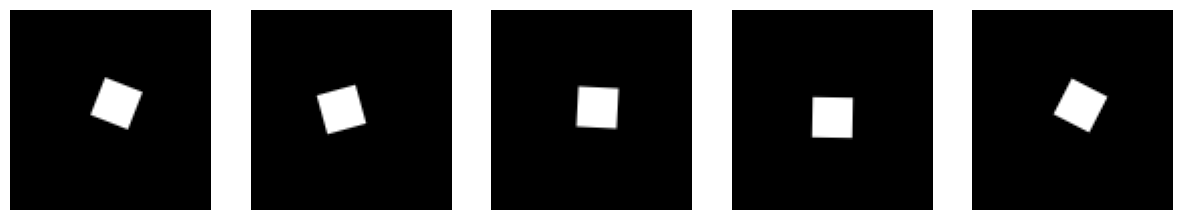

Final Decision: salmon
Prediction: trout Cost: 0
Predicted Class: [1]


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import rotate
from skimage.util import random_noise
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# ================================
# 1. Handling Invariances with Data Augmentation
# ================================

def augment_image(image, angle_range=30, translation_range=5):
    """
    Augment an image by rotating and translating it to achieve invariance.
    Parameters:
        image (numpy array): Input image to augment.
        angle_range (int): Range of angles to rotate within (-angle_range, angle_range).
        translation_range (int): Range of pixels to translate within.
    Returns:
        numpy array: Transformed image.
    """
    # Rotate the image within the specified angle range
    angle = np.random.uniform(-angle_range, angle_range)
    rotated_image = rotate(image, angle, mode='wrap')
    
    # Translate image randomly within the translation range
    shift_x = np.random.randint(-translation_range, translation_range)
    shift_y = np.random.randint(-translation_range, translation_range)
    translated_image = np.roll(np.roll(rotated_image, shift_x, axis=0), shift_y, axis=1)
    
    return translated_image

# Example usage of data augmentation for invariance handling
image = np.zeros((100, 100))
image[40:60, 40:60] = 1  # Mock square as input
augmented_images = [augment_image(image) for _ in range(5)]

# Display augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for ax, aug_img in zip(axes, augmented_images):
    ax.imshow(aug_img, cmap='gray')
    ax.axis('off')
plt.show()


# ================================
# 2. Evidence Pooling with Voting Classifier
# ================================

# Define mock classifiers for voting
def classifier1(features): return "salmon" if features[0] > 0.5 else "trout"
def classifier2(features): return "trout" if features[1] > 0.5 else "salmon"
def classifier3(features): return "salmon" if features[0] + features[1] > 0.7 else "trout"

def voting_classifier(features):
    """
    Use a voting mechanism among classifiers to make a final decision.
    Parameters:
        features (list): List of feature values for classification.
    Returns:
        str: Final classification based on majority vote.
    """
    # Collect predictions from all classifiers
    predictions = [classifier1(features), classifier2(features), classifier3(features)]
    # Count each prediction and return the most common one
    vote_counts = Counter(predictions)
    return vote_counts.most_common(1)[0][0]  # Return the most common prediction

# Example usage of voting classifier
features = [0.6, 0.4]
print("Final Decision:", voting_classifier(features))


# ================================
# 3. Cost-Sensitive Classification
# ================================

# Define cost matrix for misclassifications
costs = {
    "false_positive": 5,
    "false_negative": 1
}

def cost_sensitive_classifier(score, threshold=0.5):
    """
    Simple cost-sensitive classifier using a threshold for binary classification.
    Parameters:
        score (float): Prediction score for a positive classification.
        threshold (float): Threshold above which score is classified as positive.
    Returns:
        str: Classification label ("salmon" or "trout").
    """
    if score >= threshold:
        return "salmon"
    else:
        return "trout"

def decision_with_cost(score, threshold=0.5):
    """
    Make a classification decision that incorporates misclassification costs.
    Parameters:
        score (float): Prediction score for positive classification.
        threshold (float): Decision threshold.
    Returns:
        tuple: (classification, cost) where 'classification' is the predicted label
               and 'cost' is the associated misclassification cost.
    """
    prediction = cost_sensitive_classifier(score, threshold)
    if prediction == "salmon" and score < threshold:
        cost = costs["false_positive"]
    elif prediction == "trout" and score >= threshold:
        cost = costs["false_negative"]
    else:
        cost = 0  # No cost for correct classification
    return prediction, cost

# Example usage of cost-sensitive classification
score = 0.4
prediction, cost = decision_with_cost(score, threshold=0.6)
print("Prediction:", prediction, "Cost:", cost)


# ================================
# 4. Reducing Computational Complexity with Dimensionality Reduction
# ================================

# Generate a sample dataset
X, y = make_classification(n_samples=100, n_features=20, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization and efficiency
X_reduced = pca.fit_transform(X)

# Train a simple KNN classifier on the reduced dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_reduced, y)

def classify_with_reduction(new_data, pca, knn):
    """
    Classify new data using a PCA-reduced feature space and KNN classifier.
    Parameters:
        new_data (numpy array): New data point to classify.
        pca (PCA object): Pre-fitted PCA model for dimensionality reduction.
        knn (KNeighborsClassifier): Trained KNN classifier.
    Returns:
        int: Predicted class label.
    """
    new_data_reduced = pca.transform(new_data)
    return knn.predict(new_data_reduced)

# Example usage of reduced complexity classification
new_data = np.random.rand(1, 20)
print("Predicted Class:", classify_with_reduction(new_data, pca, knn))


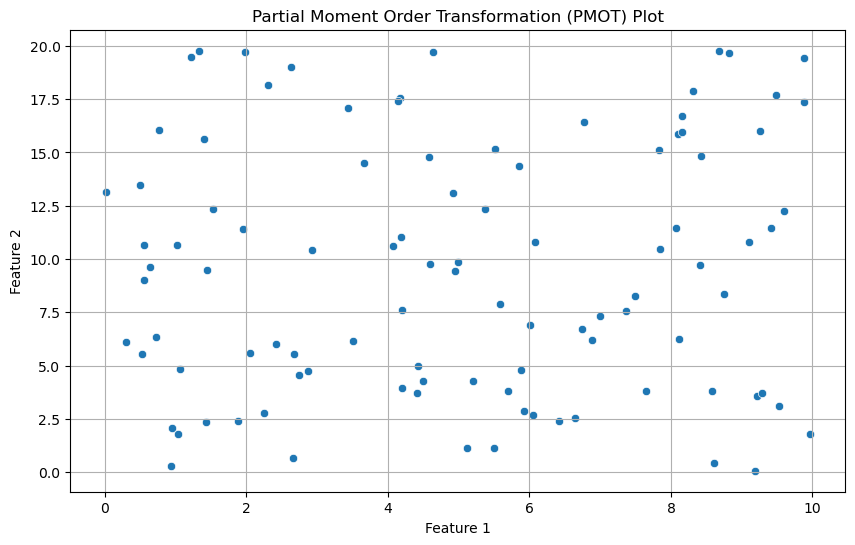

In [2]:
# Import the Seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate synthetic data to demonstrate the PMOT plot
def generate_data(n=100):
    # Random dataset with two features to simulate a transformation effect
    import random
    data = {'Feature1': [random.uniform(0, 10) for _ in range(n)],
            'Feature2': [random.uniform(0, 20) for _ in range(n)]}
    return data

# Function to plot Partial Moment Order Transformation (PMOT)
def pmot_plot(data):
    # Create a Seaborn scatter plot showing the relationship between Feature1 and Feature2
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Feature1', y='Feature2', data=data)
    plt.title('Partial Moment Order Transformation (PMOT) Plot')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Generate synthetic data and plot PMOT
data = generate_data()
pmot_plot(data)


##  Learning and Adaptation

In the broadest sense, any method that incorporates information from training samples in the design of a classifier employs learning. Because nearly all practical or interesting pattern recognition problems are so challenging that we cannot guess classification decisions ahead of time, we shall spend most of our time here considering learning. 

Creating classifiers involves positing some general form of model or classifier structure and using training patterns to learn or estimate the unknown parameters of this model. Learning refers to an algorithm for reducing error on a training dataset. A range of gradient descent algorithms that adjust a classifier’s parameters to minimize error now permeate the field of statistical pattern recognition, demanding a great deal of our attention.

Learning takes several general forms:

## 1 Supervised Learning

In supervised learning, a "teacher" provides a category label or cost for each pattern in a training set. The goal is to minimize the total cost for these patterns.

- **Key questions**:
  - Is the algorithm powerful enough to solve the problem and stable against parameter variations?
  - Will it converge in finite time?
  - How does it scale with the number of training patterns, input features, or problem complexity?
  - Does the algorithm favor simpler solutions, as in Figure 1.6, rather than overly complex ones, as in Figure 1.5?

## 2 Unsupervised Learning

In unsupervised learning, or clustering, there is no explicit teacher, and the system forms clusters or "natural groupings" of input patterns. 

- **Challenges**:
  - Defining "natural" explicitly or implicitly within the clustering system.
  - Choosing a hypothesized number of clusters ahead of time.
  - Avoiding inappropriate representations for the data.

## 3 Reinforcement Learning

The most common approach for training a classifier is to present an input, compute its tentative category label, and use the known target category label to improve the classifier. For example, in optical character recognition, if the classifier outputs "R" when it should output "B," feedback can help adjust the classifier. 

In reinforcement learning or "learning with a critic," no desired category signal is given; instead, feedback only indicates if the tentative category is right or wrong.

- **Key characteristics**:
  - Feedback is typically binary, either correct or incorrect.
  - For binary category problems with equal costs for errors, reinforcement learning resembles standard supervised learning.

The question remains: How can the system learn what is important from non-specific feedback?

## 5 Conclusion

Readers may feel overwhelmed by the number, complexity, and magnitude of these sub-problems, which are rarely isolated and often interrelated. For instance, reducing classifier complexity might impact its ability to handle invariance. 

The good news is threefold:

1. There is an "existence proof" that many of these problems are solvable, as demonstrated by humans and other biological systems.
2. Mathematical theories solving some of these problems have indeed been discovered.
3. There remain many fascinating unsolved problems that offer opportunities for progress.


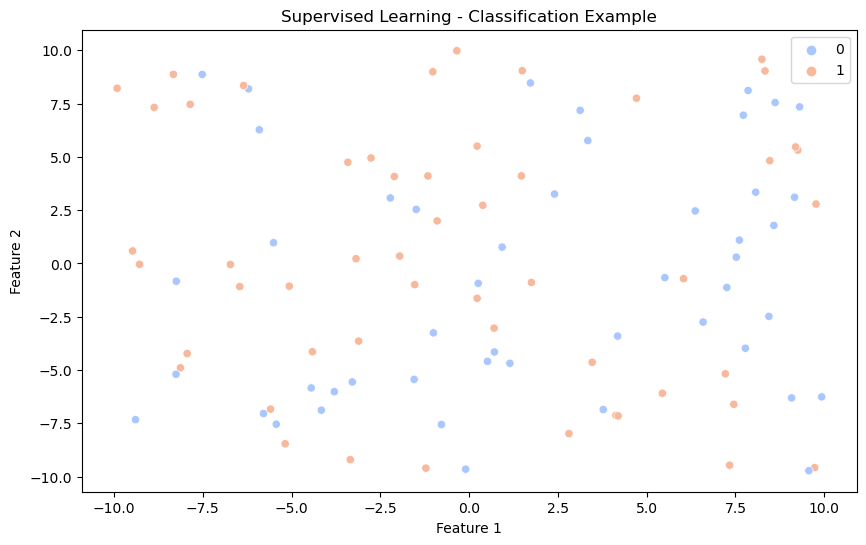

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


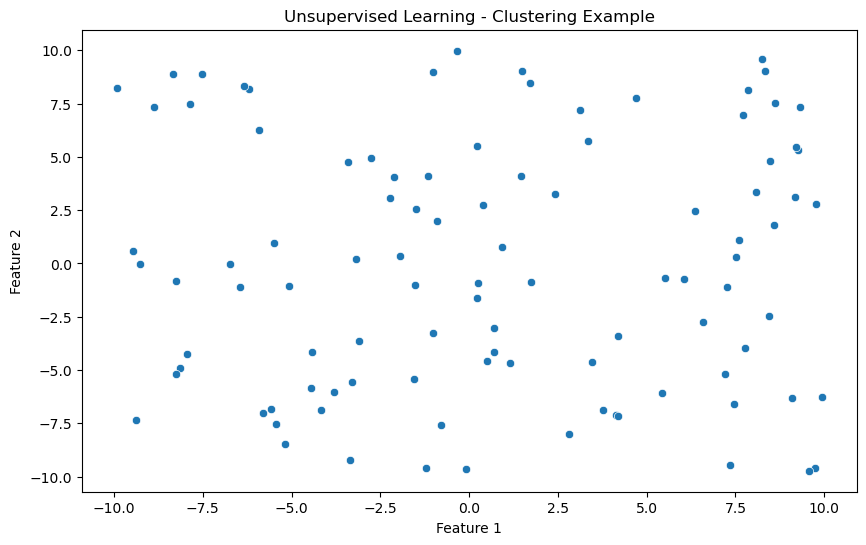

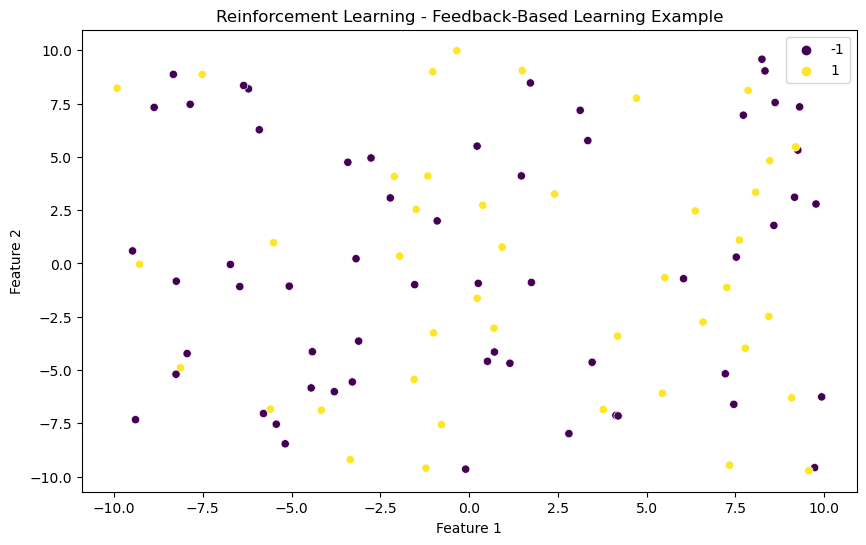

In [3]:
# Importing Seaborn for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Dummy data for demonstration
import random

# Set up random data for clustering (unsupervised learning), classification (supervised learning), and reinforcement (feedback-based learning)
data_points = 100
# Generate data points for clustering (unsupervised learning)
cluster_data = [(random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(data_points)]
# Generate labels for supervised learning
labels = [random.choice([0, 1]) for _ in range(data_points)]
# Generate reward-based feedback for reinforcement learning (dummy values)
feedback_data = [random.choice([1, -1]) for _ in range(data_points)]

# Function for supervised learning
def supervised_learning(data, labels):
    # Plotting the data points with their respective labels
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=[point[0] for point in data], y=[point[1] for point in data], hue=labels, palette="coolwarm")
    plt.title("Supervised Learning - Classification Example")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Function for unsupervised learning (clustering demonstration)
def unsupervised_learning(data):
    # Clustering data visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=[point[0] for point in data], y=[point[1] for point in data], palette="viridis")
    plt.title("Unsupervised Learning - Clustering Example")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Function for reinforcement learning
def reinforcement_learning(data, feedback):
    # Demonstrating how feedback affects data points (random rewards here for demonstration)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=[point[0] for point in data], y=[point[1] for point in data], hue=feedback, palette="viridis")
    plt.title("Reinforcement Learning - Feedback-Based Learning Example")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Run examples
supervised_learning(cluster_data, labels)
unsupervised_learning(cluster_data)
reinforcement_learning(cluster_data, feedback_data)
